### Lectura de datos

Definicion Distancia Mahalanobis 'https://www.statology.org/mahalanobis-distance-python/'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.covariance import LedoitWolf
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet

In [ ]:
df_datos_limpios = pd.read_csv("https://raw.githubusercontent.com/slopezv2/PCARobusto/main/Datos/SaratogaHouses.csv",header=0)

In [ ]:
df_datos_limpios

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,3,2,1,2,2,2
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,2,1,1,2,2,2
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,2,1,2,2,2,2
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,1,1,1,2,2,2
4,86060,0.11,0,15000,840,51,2,0,1.0,3,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,2,1,2,2,2,2
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,2,1,2,2,2,2
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,1,1,2,2,2,2
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,1,1,2,2,2,2


In [ ]:
df_datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   int64  
 11  fuel             1728 non-null   int64  
 12  sewer            1728 non-null   int64  
 13  waterfront       1728 non-null   int64  
 14  newConstruction  1728 non-null   int64  
 15  centralAir       1728 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 216.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe161de0a90>,
      dtype=object)

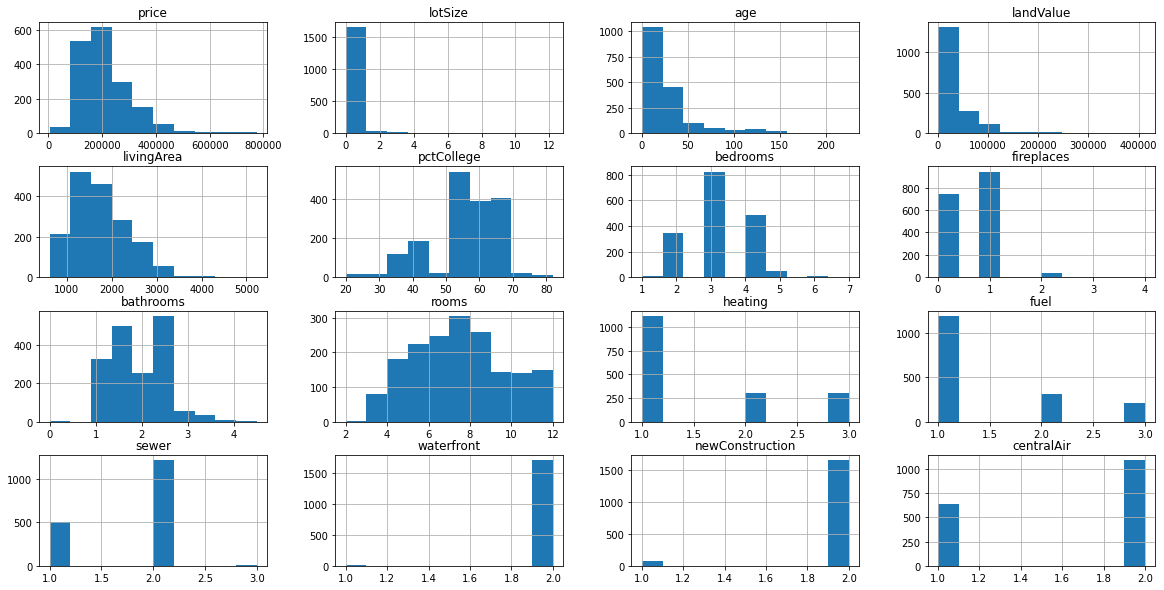

In [ ]:
df_datos_limpios.hist(figsize=(20,10))

# Definición de PCA:

In [ ]:
import numpy as np
 
def PCA_manual(X , num_components, covariance_matrix=None):
    """
    Taken from: https://www.askpython.com/python/examples/principal-component-analysis
    adapted to receive the covariance matrix
    """ 
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    if covariance_matrix is None:
      cov_mat = np.cov(X_meaned , rowvar = False)
    else :
      cov_mat = covariance_matrix
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced, sorted_eigenvalue

In [ ]:
df_datos_centralizo=df_datos_limpios-df_datos_limpios.mean() #Datos centralizados

## 1. Detección de punto atípicos con Covarianza Clásica:

In [ ]:
X_centralizada=pd.DataFrame(df_datos_centralizo)
X_centralizada = X_centralizada.values
Número_filas, Número_columnas=X_centralizada.shape

Transpuesta=X_centralizada.transpose()
cov=np.cov(X_centralizada, rowvar=False)
Inverso_covarianza=np.linalg.inv(cov)
MD=np.zeros((Número_filas, 1))

for i in range(1,Número_filas):
    tem1=np.dot(X_centralizada[i,:],Inverso_covarianza)
    tem2=np.dot(tem1,Transpuesta[:,i])
    MD[i]=np.sqrt(tem2)

print('La distancia de Mahalanobis es: \n', MD)

La distancia de Mahalanobis es: 
 [[0.        ]
 [3.52888856]
 [4.86215272]
 ...
 [3.1538128 ]
 [2.78397522]
 [4.1208988 ]]


In [ ]:
MD = pd.DataFrame(MD)
MD.columns = ['Distancias_Mahal']
MD.set_index(df_datos_limpios.index,inplace=True)

corte = np.percentile(MD, 70)
print('La distancia de corte es: ',corte)

X_99 = []
X_99 = pd.concat([df_datos_limpios,MD],axis=1)
X_sin_corte = X_99.copy()
X_99_corte = X_99['Distancias_Mahal'] < corte
X_99 = X_99[X_99_corte]
X_99.reset_index(drop=True, inplace=True)
X_99 = X_99.drop(['Distancias_Mahal'],axis=1)
X_99

La distancia de corte es:  3.8741715492884583


,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,3,2,1,2,2,2
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,2,1,1,2,2,2
2,155000,0.41,13,18700,1944,51,3,1,1.5,5,1,1,1,2,2,2
3,90000,0.83,36,22200,1632,51,3,0,1.5,8,3,2,1,2,2,2
4,120000,0.92,1,22300,1624,51,3,0,2.0,6,1,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,249000,0.43,41,45800,2426,61,4,2,2.0,7,2,1,2,2,2,2
1205,289000,0.38,32,24200,2310,61,5,1,2.5,11,2,1,2,2,2,2
1206,285000,0.94,37,36200,2564,61,4,1,2.5,11,2,1,2,2,2,2
1207,194900,0.39,9,20400,1099,51,2,0,1.0,3,1,1,2,2,2,2


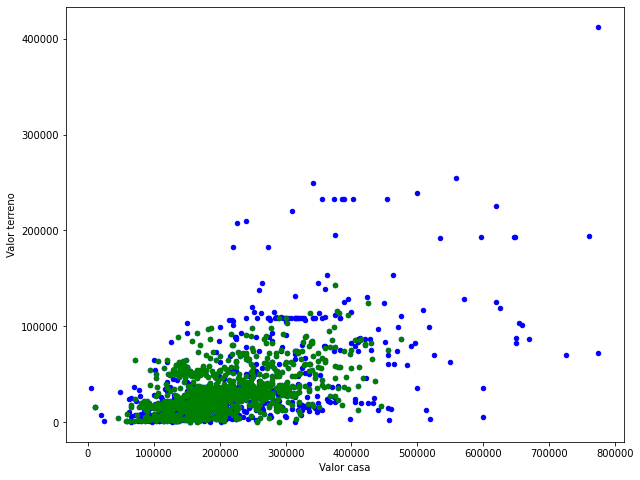

In [ ]:
X_sin_corte["recorte"] = np.where(X_sin_corte['Distancias_Mahal'] < corte, "green", "blue")

ax = X_sin_corte.plot(x="price",y="landValue",kind="scatter", color="blue", xlabel="Valor casa", ylabel="Valor terreno", figsize=(10,8))
X_99.plot(x="price",y="landValue",kind="scatter", color="green", ax=ax,xlabel="Valor casa", ylabel="Valor terreno")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1615a6610>]],
      dtype=object)

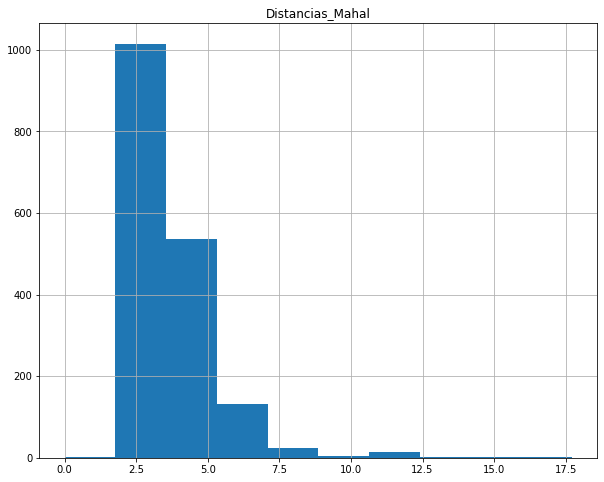

In [ ]:
MD.hist(figsize=(10,8))

## 2. Detección de punto atípicos con Covarianza Robusta No Paramétrica (MCD):

In [ ]:
X_centralizada_R=[]
X_centralizada_R=X_centralizada
Transpuesta=[]
Transpuesta=X_centralizada_R.transpose()
robust_cov=[]
robust_cov = MinCovDet(random_state=8).fit(df_datos_limpios) #MCD
Inverso_covarianza_robusta=[] 
Inverso_covarianza_robusta=np.linalg.inv(robust_cov.covariance_)
MDR=[]
MDR=np.zeros((Número_filas, 1))

tem1=[]
tem2=[]
for i in range(1,Número_filas):
    tem1=np.dot(X_centralizada[i,:],Inverso_covarianza_robusta)
    tem2=np.dot(tem1,Transpuesta[:,i])
    MDR[i]=np.sqrt(tem2)

print('La distancia de Mahalanobis Robusta es: \n', MDR)

La distancia de Mahalanobis Robusta es: 
 [[ 0.        ]
 [ 6.88370577]
 [10.95206563]
 ...
 [ 4.63116954]
 [ 3.60112297]
 [ 6.83662741]]


In [ ]:
MDR = pd.DataFrame(MDR)
MDR.columns = ['Distancias_Mahal_Robusta']
MDR.set_index(df_datos_limpios.index,inplace=True)

corte = np.percentile(MDR, 70)
print('La distancia de corte es: ',corte)

X_99_R = []
X_99_R = pd.concat([df_datos_limpios,MDR],axis=1)
X_R_sin_corte = X_99_R.copy()
X_99_R_corte = X_99_R['Distancias_Mahal_Robusta'] < corte
X_99_R = X_99_R[X_99_R_corte]
X_99_R.reset_index(drop=True, inplace=True)
X_99_R = X_99_R.drop(['Distancias_Mahal_Robusta'],axis=1)
X_99_R

La distancia de corte es:  6.427331863429021


,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,3,2,1,2,2,2
1,155000,0.41,13,18700,1944,51,3,1,1.5,5,1,1,1,2,2,2
2,120000,0.68,31,14000,1152,22,4,1,1.0,8,1,1,1,2,2,2
3,90000,0.83,36,22200,1632,51,3,0,1.5,8,3,2,1,2,2,2
4,120000,0.92,1,22300,1624,51,3,0,2.0,6,1,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,249000,0.43,41,45800,2426,61,4,2,2.0,7,2,1,2,2,2,2
1205,289000,0.38,32,24200,2310,61,5,1,2.5,11,2,1,2,2,2,2
1206,285000,0.94,37,36200,2564,61,4,1,2.5,11,2,1,2,2,2,2
1207,194900,0.39,9,20400,1099,51,2,0,1.0,3,1,1,2,2,2,2


In [ ]:
print(X_R_sin_corte.shape)
X_R_sin_corte["recorte"] = np.where(X_R_sin_corte['Distancias_Mahal_Robusta'] < corte, "green", "blue")
X_R_sin_corte

(1728, 17)


,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,Distancias_Mahal_Robusta,recorte
0,132500,0.09,42,50000,906,35,2,1,1.0,5,3,2,1,2,2,2,0.000000,green
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,2,1,1,2,2,2,6.883706,blue
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,2,1,2,2,2,2,10.952066,blue
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,1,1,1,2,2,2,4.921987,green
4,86060,0.11,0,15000,840,51,2,0,1.0,3,1,1,2,2,1,1,19.444904,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,2,1,2,2,2,2,5.138166,green
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,2,1,2,2,2,2,4.638282,green
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,1,1,2,2,2,2,4.631170,green
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,1,1,2,2,2,2,3.601123,green


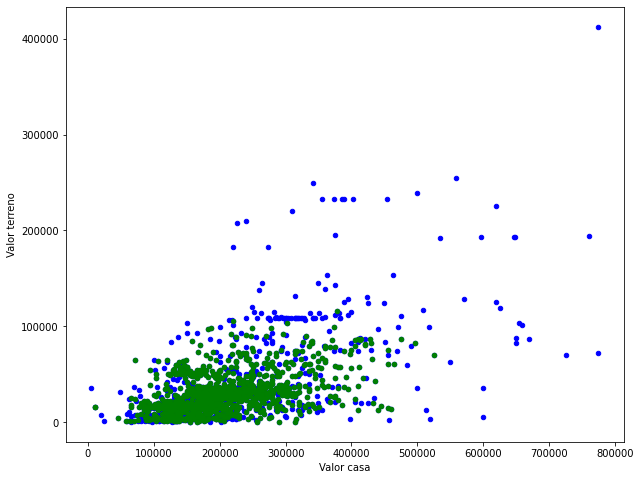

In [ ]:
ax = X_R_sin_corte.plot(x="price",y="landValue",kind="scatter", color="blue", xlabel="Valor casa", ylabel="Valor terreno", figsize=(10,8))
X_99_R.plot(x="price",y="landValue",kind="scatter", color="green", ax=ax,xlabel="Valor casa", ylabel="Valor terreno")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe15c7efa50>]],
      dtype=object)

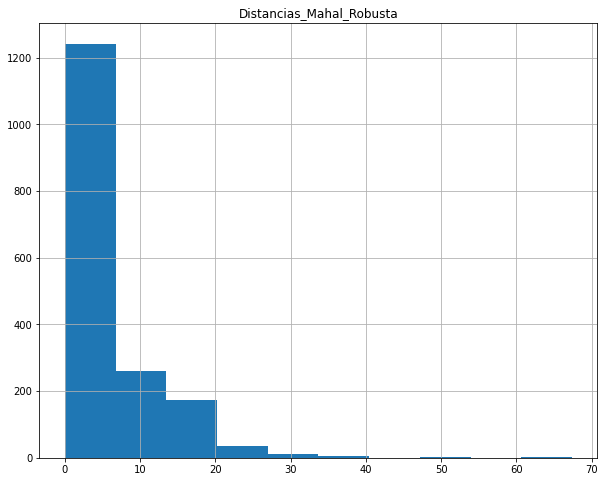

In [ ]:
MDR.hist(figsize=(10,8))

## 3. Detección de punto atípicos con Covarianza encojida (Ledoit and Wolf):

In [ ]:
cov_LW = LedoitWolf().fit(df_datos_centralizo) #Mejora de la Matriz de Covarianza con Ledoit and Wolf
cov_LW_encogida = cov_LW.covariance_
cov_LW_shrinkage = cov_LW.shrinkage_
cov_LW_shrinkage

0.004447944363455394

In [ ]:
X_centralizada=pd.DataFrame(df_datos_centralizo)
X_centralizada = X_centralizada.values
Número_filas, Número_columnas=X_centralizada.shape

Transpuesta=X_centralizada.transpose()
cov_LW_encogida=cov_LW_encogida
Inverso_covarianza=np.linalg.inv(cov_LW_encogida)
MD=np.zeros((Número_filas, 1))

for i in range(1,Número_filas):
    tem1=np.dot(X_centralizada[i,:],Inverso_covarianza)
    tem2=np.dot(tem1,Transpuesta[:,i])
    MD[i]=np.sqrt(tem2)

print('La distancia de Mahalanobis es: \n', MD)

La distancia de Mahalanobis es: 
 [[0.        ]
 [0.42073245]
 [1.13074461]
 ...
 [0.5223549 ]
 [0.88903144]
 [1.16993379]]


In [ ]:
MD = pd.DataFrame(MD)
MD.columns = ['Distancias_Mahal']
MD.set_index(df_datos_limpios.index,inplace=True)

corte = np.percentile(MD, 70)
print('La distancia de corte es: ',corte)

X_99 = []
X_99 = pd.concat([df_datos_limpios,MD],axis=1)
X_sin_corte = X_99.copy()
X_99_corte = X_99['Distancias_Mahal'] < corte
X_99 = X_99[X_99_corte]
X_99.reset_index(drop=True, inplace=True)
X_99 = X_99.drop(['Distancias_Mahal'],axis=1)
X_99

La distancia de corte es:  1.1821987076120932


,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,3,2,1,2,2,2
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,2,1,1,2,2,2
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,2,1,2,2,2,2
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,1,1,1,2,2,2
4,120000,0.68,31,14000,1152,22,4,1,1.0,8,1,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,249000,0.43,41,45800,2426,61,4,2,2.0,7,2,1,2,2,2,2
1205,285000,0.94,37,36200,2564,61,4,1,2.5,11,2,1,2,2,2,2
1206,194900,0.39,9,20400,1099,51,2,0,1.0,3,1,1,2,2,2,2
1207,125000,0.24,48,16800,1225,51,3,1,1.0,7,1,1,2,2,2,2


In [ ]:
X_sin_corte["recorte"] = np.where(X_sin_corte['Distancias_Mahal'] < corte, "green", "blue")

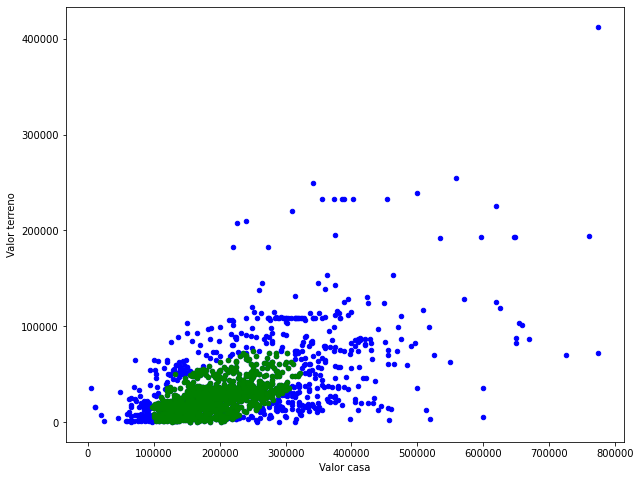

In [ ]:
ax = X_sin_corte.plot(x="price",y="landValue",kind="scatter", color="blue", xlabel="Valor casa", ylabel="Valor terreno", figsize=(10,8))
X_99.plot(x="price",y="landValue",kind="scatter", color="green", ax=ax,xlabel="Valor casa", ylabel="Valor terreno")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1615fb290>]],
      dtype=object)

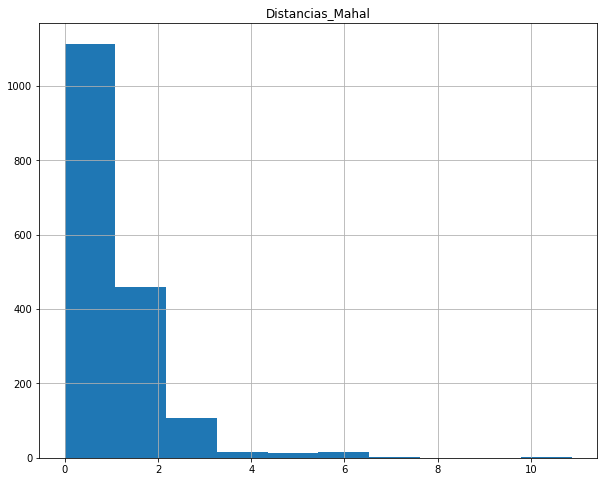

In [ ]:
MD.hist(figsize=(10,8))

### Aplicación de PCA con Covarianza Clásica:

In [ ]:
cov_LW99 = LedoitWolf().fit(X_99)
cov_LW99_encogida = cov_LW.covariance_ 
autovalor,autovector = np.linalg.eig(cov_LW99_encogida) 
#autovalor.round(3)
#autovector.round(3)
#Proporción de los autovalores:
proporcion=autovalor/sum(autovalor)
proporcion

array([9.25049072e-01, 7.10416383e-02, 2.95251917e-04, 2.78070387e-04,
       2.78005602e-04, 2.77996752e-04, 2.77996591e-04, 2.77996569e-04,
       2.77996523e-04, 2.77996526e-04, 2.77996552e-04, 2.77996549e-04,
       2.77996545e-04, 2.77996539e-04, 2.77996535e-04, 2.77996537e-04])

In [ ]:
#Se procede a extraer la columna 1 ya que es el vector de proyección de la máxima sombra, así:
vector_proyeccion=autovector[:,0]

## Forma 1 PCA

In [ ]:
# Forma 1 PCA lib y forma 2: manual PCA

# Instanciar número de componentes
n_componentes = 10 # intuición
matriz_pca, eigen_valores = PCA_manual(df_datos_limpios, n_componentes,cov_LW_encogida)
pca = PCA(n_components = n_componentes)
pca

PCA(n_components=10)

In [ ]:
total = np.sum(eigen_valores)
proporciones = eigen_valores / total
acumulado = np.sum(proporciones)
acumulado

1.0

In [ ]:
proporciones

array([9.25049072e-01, 7.10416383e-02, 2.95251917e-04, 2.78070387e-04,
       2.78005602e-04, 2.77996752e-04, 2.77996591e-04, 2.77996569e-04,
       2.77996552e-04, 2.77996549e-04, 2.77996545e-04, 2.77996539e-04,
       2.77996537e-04, 2.77996535e-04, 2.77996526e-04, 2.77996523e-04])

In [ ]:
X_PCA = pca.fit_transform(cov_LW_encogida) 
X_PCA = pd.DataFrame(X_PCA)

pca.explained_variance_ratio_

array([9.93811246e-01, 6.18745985e-03, 1.10341577e-07, 9.86657469e-08,
       9.86232892e-08, 9.86175397e-08, 9.86174323e-08, 9.86174256e-08,
       9.86174116e-08, 9.86174107e-08])

In [ ]:
eigen_valores

array([1.00934481e+10, 7.75153568e+08, 3.22156952e+06, 3.03409743e+06,
       3.03339055e+06, 3.03329399e+06, 3.03329223e+06, 3.03329199e+06,
       3.03329180e+06, 3.03329177e+06, 3.03329173e+06, 3.03329166e+06,
       3.03329163e+06, 3.03329162e+06, 3.03329152e+06, 3.03329149e+06])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9999995069129973

In [ ]:
sum(pca.explained_variance_ratio_[:1])

0.99381124634689

In [ ]:
X_PCA[0]

0     9.091920e+09
1    -7.563880e+08
2    -7.569314e+08
3     1.453579e+09
4    -7.121724e+08
5    -7.561834e+08
6    -7.563663e+08
7    -7.563780e+08
8    -7.563598e+08
9    -7.562760e+08
10   -7.564176e+08
11   -7.564140e+08
12   -7.563948e+08
13   -7.564004e+08
14   -7.564025e+08
15   -7.564151e+08
Name: 0, dtype: float64

## 2. PCA Robusto (MCD)

In [ ]:
cov_MCD = MinCovDet().fit(X_99_R)
cov_MCD_encogida = cov_MCD.covariance_ 
autovalor,autovector = np.linalg.eig(cov_MCD_encogida) 
#autovalor.round(3)
#autovector.round(3)
#Proporción de los autovalores:
proporcion=autovalor/sum(autovalor)
proporcion

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"


array([9.58773454e-01, 4.12046552e-02, 2.18612361e-05, 1.83803950e-08,
       1.03168477e-08, 4.78449802e-10, 1.52377346e-10, 3.45149292e-12,
       2.42766731e-12, 1.76277361e-11, 2.82315555e-11, 3.26069866e-11,
       4.26189343e-11, 4.75666627e-11, 0.00000000e+00, 0.00000000e+00])

In [ ]:
#Se procede a extraer la columna 1 ya que es el vector de proyección de la máxima sombra, así:
vector_proyeccion=autovector[:,0]

In [ ]:
# Instanciar número de componentes
n_componentes = 10 # intuición
pca = PCA(n_components = n_componentes)
pca

PCA(n_components=10)

In [ ]:
X_PCA_R = pca.fit_transform(cov_MCD_encogida) 
X_PCA_R = pd.DataFrame(X_PCA_R)

pca.explained_variance_ratio_

array([9.98103721e-01, 1.89627881e-03, 5.21958841e-10, 3.48044096e-16,
       1.20438566e-16, 2.41955693e-19, 2.23092219e-20, 2.59871134e-21,
       1.60980687e-21, 1.07196768e-21])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

In [ ]:
sum(pca.explained_variance_ratio_[:1])

0.9981037206649133

In [ ]:
X_PCA_R[0]

0     4.404202e+09
1    -3.335579e+08
2    -3.337170e+08
3     2.396934e+08
4    -3.076813e+08
5    -3.334097e+08
6    -3.335343e+08
7    -3.335510e+08
8    -3.335402e+08
9    -3.334809e+08
10   -3.335836e+08
11   -3.335749e+08
12   -3.335626e+08
13   -3.335641e+08
14   -3.335641e+08
15   -3.335738e+08
Name: 0, dtype: float64

In [ ]:
X_PCA_R

,0,1,2,3,4,5,6,7,8,9
0,4.404202e+09,-2.329896e+07,-533.743435,0.006689,-0.000195,-0.000005,0.000002,-8.964896e-08,-1.425001e-07,1.468149e-08
1,-3.335579e+08,-1.215134e+07,-7831.651890,-8.553192,-3.240076,-0.205322,-0.111486,-1.426775e-02,-1.714026e-02,-1.100600e-03
2,-3.337170e+08,-1.211426e+07,-7286.393409,79.235475,-12.873966,-0.025077,-0.001646,3.495874e-03,-9.804303e-04,-2.403943e-03
3,2.396934e+08,1.930975e+08,-148.174633,-0.016406,-0.006452,-0.000009,0.000007,-4.765587e-07,1.412897e-07,5.335175e-07
4,-3.076813e+08,-1.190394e+07,101016.603240,-0.448012,-0.166917,-0.005923,0.000304,2.674378e-05,-1.415299e-04,-3.152784e-08
5,-3.334097e+08,-1.211281e+07,-7275.472688,15.284629,47.522049,0.000462,0.001468,-3.726727e-03,-1.040109e-03,8.005211e-04
6,-3.335343e+08,-1.215072e+07,-7717.665493,-7.308705,-3.461266,0.031656,-0.157599,-1.310408e-01,1.254981e-01,1.970936e-02
7,-3.335510e+08,-1.215119e+07,-7803.511740,-8.380671,-2.706231,-0.254041,-0.159296,1.453432e-01,3.174055e-02,9.596177e-02
8,-3.335402e+08,-1.215208e+07,-7779.714018,-9.852498,-2.817445,-0.220181,-0.131435,3.189964e-02,3.835344e-02,-7.582712e-02
9,-3.334809e+08,-1.214993e+07,-7530.582684,-7.745673,-3.176226,2.137752,0.035476,1.926105e-02,-1.076320e-02,-2.643066e-03


In [ ]:
x_values, eigen_valores = PCA_manual(df_datos_limpios, 10, covariance_matrix=cov_MCD_encogida)

In [ ]:
x_values

array([[ 7.70367159e+04,  2.48857071e+04, -4.52328146e+02, ...,
        -7.90037084e-01, -5.82019043e-01,  4.34144303e-01],
       [ 3.21001548e+04, -8.45824050e+03,  3.79129200e+02, ...,
         8.55161237e-01,  1.60961861e-01,  1.34964333e-01],
       [ 1.05494542e+05, -1.46777259e+04,  7.74160104e+02, ...,
        -1.54793758e+00,  3.75489902e-01, -4.97313143e-01],
       ...,
       [ 1.86484638e+04, -1.20027874e+04, -5.44765883e+02, ...,
         4.83855820e-01,  6.30879851e-01,  3.71383513e-01],
       [ 8.84724690e+04, -7.17124765e+03, -4.39645450e+01, ...,
        -3.48495254e-01, -1.51032978e-01,  3.92905643e-01],
       [ 1.00962669e+05,  3.61001307e+03,  7.48800241e+02, ...,
        -6.62591894e-01,  1.31677347e+00, -2.64045193e-01]])

- Se van a seleccionar las 2 primeras componentes para graficar la informacion

In [ ]:
dos_componentes = x_values[:,:2]

In [ ]:
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


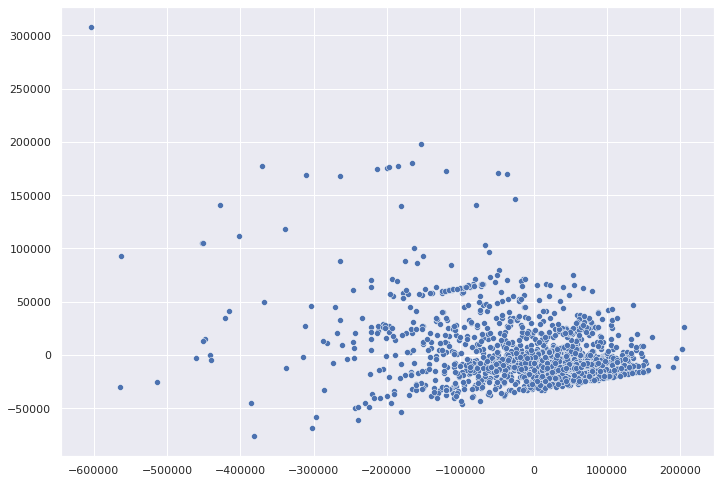

In [ ]:
sns.scatterplot(x_values[:,0],x_values[:,1])

In [ ]:
from sklearn.cluster import AffinityPropagation

In [ ]:
df_x_values = pd.DataFrame(x_values)

In [ ]:
clf = AffinityPropagation(random_state=5,damping=0.6,convergence_iter=5,max_iter=1000,affinity='euclidean',verbose=True)

In [ ]:
clf.fit(df_x_values)

Converged after 84 iterations.


AffinityPropagation(convergence_iter=5, damping=0.6, max_iter=1000,
                    random_state=5, verbose=True)

In [ ]:
df_x_values["etiqueta"] = clf.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


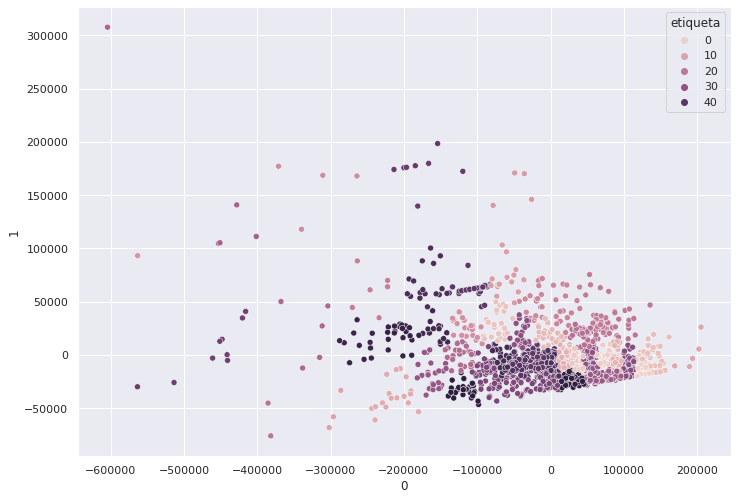

In [ ]:
sns.scatterplot(df_x_values.iloc[:,0],df_x_values.iloc[:,1], hue=df_x_values["etiqueta"])

In [ ]:
df_x_values_no_etiqueta = df_x_values.drop(axis=1,columns=["etiqueta"])

In [ ]:
clf = AffinityPropagation(random_state=5,damping=0.9,convergence_iter=5,max_iter=1000,affinity='euclidean',verbose=True)

In [ ]:
clf.fit(df_x_values_no_etiqueta)

Converged after 5 iterations.


AffinityPropagation(convergence_iter=5, damping=0.9, max_iter=1000,
                    random_state=5, verbose=True)

In [ ]:
df_x_values["etiqueta"] = clf.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


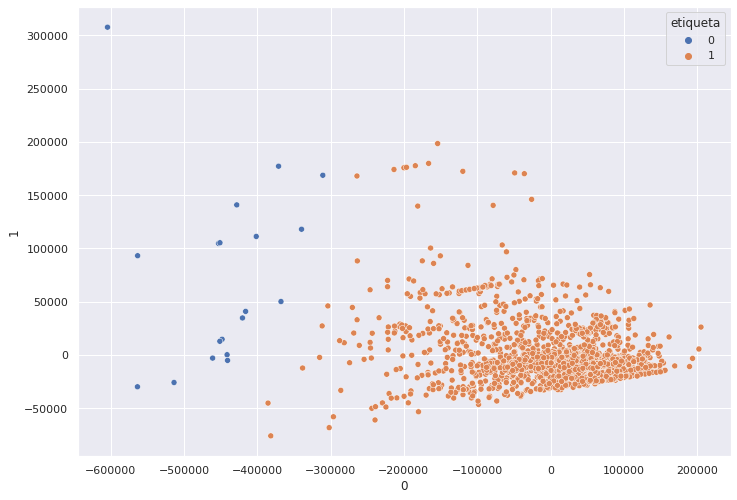

In [ ]:
sns.scatterplot(df_x_values.iloc[:,0],df_x_values.iloc[:,1], hue=df_x_values["etiqueta"])

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clf = AgglomerativeClustering(n_clusters=5,affinity='euclidean',compute_full_tree='auto',linkage='ward').fit(df_x_values_no_etiqueta)

In [ ]:
df_x_values["etiqueta"] = clf.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


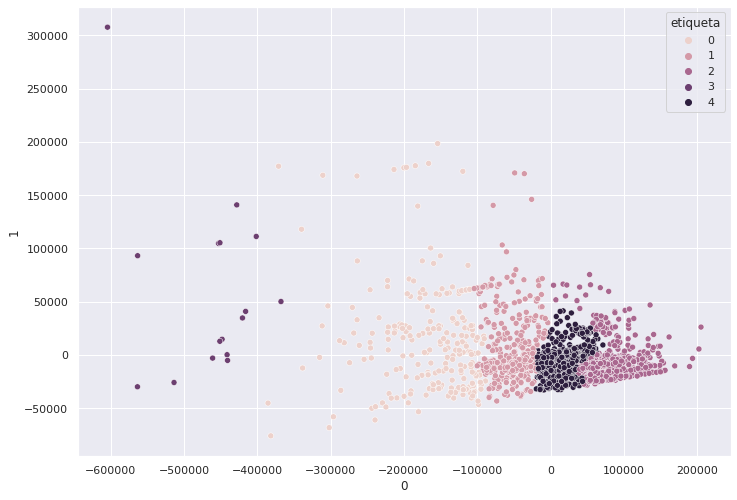

In [ ]:
sns.scatterplot(df_x_values.iloc[:,0],df_x_values.iloc[:,1], hue=df_x_values["etiqueta"])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clf = KMeans(n_clusters=5,init='k-means++',n_init=50,max_iter=500,verbose=1,random_state=5,algorithm='elkan').fit(df_x_values_no_etiqueta)

Initialization complete
Iteration 0, inertia 4261815078443.0293
Iteration 1, inertia 3262895020133.606
Iteration 2, inertia 3211920905385.0376
Iteration 3, inertia 3183046701044.8877
Iteration 4, inertia 3166764736342.5215
Iteration 5, inertia 3159197072331.949
Iteration 6, inertia 3156571278880.6978
Iteration 7, inertia 3155070257813.923
Iteration 8, inertia 3153274311861.948
Iteration 9, inertia 3144242805145.714
Iteration 10, inertia 3126465611556.5024
Iteration 11, inertia 3099306512653.203
Iteration 12, inertia 3062607667160.4443
Iteration 13, inertia 2997054024458.384
Iteration 14, inertia 2918837208605.548
Iteration 15, inertia 2861136779499.1504
Iteration 16, inertia 2836273173308.9297
Iteration 17, inertia 2821780327081.8867
Iteration 18, inertia 2815215908567.417
Iteration 19, inertia 2805603482202.578
Iteration 20, inertia 2798511447682.413
Iteration 21, inertia 2790349137469.945
Iteration 22, inertia 2783658176724.664
Iteration 23, inertia 2779229152496.9644
Iteration 24, i

In [ ]:
df_x_values["etiqueta"] = clf.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


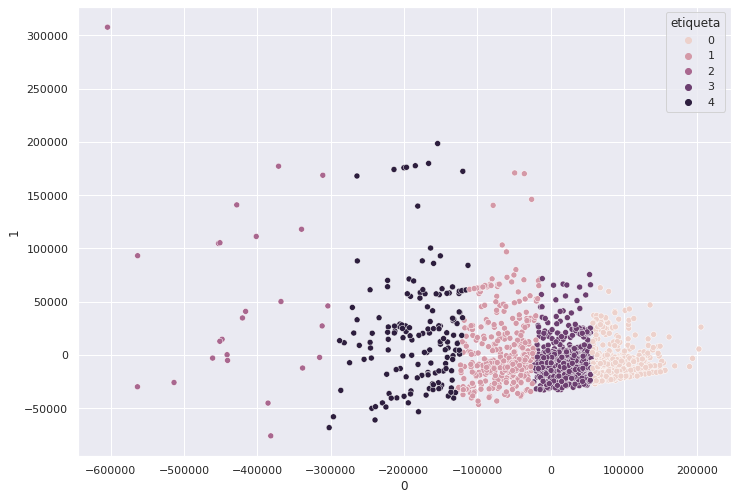

In [ ]:
sns.scatterplot(df_x_values.iloc[:,0],df_x_values.iloc[:,1], hue=df_x_values["etiqueta"])

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
clf = DBSCAN(eps=1, min_samples=2,metric='euclidean',algorithm='auto',n_jobs=-1).fit(df_x_values_no_etiqueta)

In [ ]:
df_x_values["etiqueta"] = clf.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


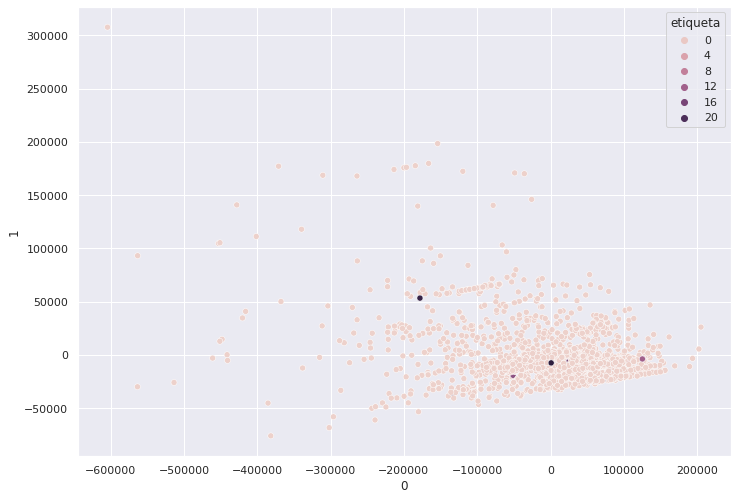

In [ ]:
sns.scatterplot(df_x_values.iloc[:,0],df_x_values.iloc[:,1], hue=df_x_values["etiqueta"])